In [35]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


In [2]:
#params

plot_eke_monthly=False
plot_eke_12_month=True
plot_eke_annual=False


In [3]:
config='EU36'
case='MPC001'
freq='1d'
year='2011'

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'

In [4]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

In [26]:
def compute_EKE(u2,v2,u2mean,v2mean):
    ua=0.5*((-1*u2+u2mean)+(-1*u2.shift(x=1)+u2mean.shift(x=1)))
    va=0.5*((-1*v2+v2mean)+(-1*v2.shift(y=1)+v2mean.shift(y=1)))
    uat=ua.rename({'depthu':'deptht'})
    vat=va.rename({'depthv':'deptht'})
    eke=0.5*(uat+vat)
    return eke


In [7]:
month_name={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
def plot_monthly(var,mask,vmin,vmax,cmap,title,figfile):
    fig, axes = plt.subplots(3,4,figsize=(30,20))
    axes = axes.ravel()
    for m in np.arange(1,13):
        if m < 10:
            month='0'+str(m)
        else:
            month=str(m)
        if m in [1,3,5,7,8,10,12]:
            dayf='31'
        elif m == 2:
            dayf='28'
        else:
            dayf='30'
        ax=axes[m-1]
        var.sel(time_counter=slice(str(year)+'-'+month+'-01',str(year)+'-'+month+'-'+dayf)).mean(dim='time_counter').where(mask==1).plot(cmap=cmap,ax=ax,vmin=vmin,vmax=vmax,add_labels=True)
        ax.set_title(month_name[m])
    fig.suptitle('Monthly mean of '+str(title))
    plt.savefig(config+'-'+case+'y'+str(year)+'.1m_'+figfile+'.png')

In [8]:
month_name={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
def plot_one_month(var,mask,vmin,vmax,cmap,title,figfile,month,year,m):
    fig, ax = plt.subplots(1,1,figsize=(10,15))
    var.mean(dim='time_counter').where(mask==1).plot(cmap=cmap,ax=ax,vmin=vmin,vmax=vmax,add_labels=True)
    ax.set_title(month_name[m])
    fig.suptitle('Monthly mean of '+str(title))
    plt.savefig(config+'-'+case+'y'+str(year)+'m'+str(month)+'_'+figfile+'.png')
    

In [9]:
def plot_annual(var,mask,vmin,vmax,cmap,title,figfile):
    fig, ax = plt.subplots(1,1,figsize=(10,15))
    var.sel(time_counter=slice(str(year)+'-01-01',str(year)+'-12-31')).mean(dim='time_counter').where(mask==1).plot(cmap=cmap,ax=ax,vmin=vmin,vmax=vmax,add_labels=True)
    fig.suptitle('Annual mean of '+str(title))
    plt.savefig(config+'-'+case+'_y'+str(year)+'.1y_'+figfile+'.png')    

In [28]:
#filesU=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridU.nc'))
#filesV=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridV.nc'))
dsU=xr.open_mfdataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridU.nc', chunks={'x':700,'y':1000,'time_counter':1,'depthu':1})
dsV=xr.open_mfdataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridV.nc', chunks={'x':700,'y':1000,'time_counter':1,'depthv':1})
u=dsU.vozocrtx
v=dsV.vomecrty
mask=dsmask.tmask[0]
u2=u*u
v2=v*v
u2mean=u2.mean(dim='time_counter')
v2mean=v2.mean(dim='time_counter')
eke=compute_EKE(u2,v2,u2mean,v2mean)

In [16]:
umean=u.mean('time_counter')

In [17]:
anom=u-umean

In [18]:
anom

<xarray.DataArray 'vozocrtx' (time_counter: 31, depthu: 75, y: 1718, x: 732)>
dask.array<shape=(31, 75, 1718, 732), dtype=float32, chunksize=(1, 1, 1000, 700)>
Coordinates:
    nav_lat        (y, x) float32 32.741238 32.741158 32.741077 ... -1.0 -1.0
    nav_lon        (y, x) float32 -17.140152 -17.112343 -17.084534 ... -1.0 -1.0
  * depthu         (depthu) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x

In [23]:
u2[0,0,100,100].values

array(0.04097829, dtype=float32)

In [24]:
u2mean[0,100,100].values

array(0.07942948, dtype=float32)

In [25]:
anom=u2-u2mean
anom[0,0,100,100].values

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-0.03845118, dtype=float32)

In [28]:
ua=0.5*((u2mean-u*u)+(u2mean.shift(x=1)-u.shift(x=1)*u.shift(x=1)))

In [30]:
u

<xarray.DataArray 'vozocrtx' (time_counter: 31, depthu: 75, y: 1718, x: 732)>
dask.array<shape=(31, 75, 1718, 732), dtype=float32, chunksize=(1, 1, 1000, 700)>
Coordinates:
    nav_lat        (y, x) float32 32.741238 32.741158 32.741077 ... -1.0 -1.0
    nav_lon        (y, x) float32 -17.140152 -17.112343 -17.084534 ... -1.0 -1.0
  * depthu         (depthu) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           ocean current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  180 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 180 s)

In [31]:
u2mean

<xarray.DataArray 'vozocrtx' (depthu: 75, y: 1718, x: 732)>
dask.array<shape=(75, 1718, 732), dtype=float32, chunksize=(1, 1000, 700)>
Coordinates:
    nav_lat  (y, x) float32 32.741238 32.741158 32.741077 ... -1.0 -1.0 -1.0
    nav_lon  (y, x) float32 -17.140152 -17.112343 -17.084534 ... -1.0 -1.0 -1.0
  * depthu   (depthu) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
Dimensions without coordinates: y, x

In [29]:
ua[0,:,:,0].plot()

<xarray.DataArray 'vozocrtx' (depthu: 75, y: 1718, x: 732, time_counter: 31)>
dask.array<shape=(75, 1718, 732, 31), dtype=float32, chunksize=(1, 1000, 700, 1)>
Coordinates:
    nav_lat        (y, x) float32 32.741238 32.741158 32.741077 ... -1.0 -1.0
    nav_lon        (y, x) float32 -17.140152 -17.112343 -17.084534 ... -1.0 -1.0
  * depthu         (depthu) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x

In [32]:
u2mean_br=xr.broadcast(u2mean,u)

In [ ]:
ua_br=0.5*((u2mean_br-u*u)+(u2mean_br.shift(x=1)-u.shift(x=1)*u.shift(x=1)))

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
ua_br

In [32]:
!ln -sf /scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc mesh_zgr.nc

!cdfmoy -l /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridU.nc -o /scratch/cnt0024/hmg2840/albert7a/tests/U2.nc
!cdfmoy -l /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridV.nc -o /scratch/cnt0024/hmg2840/albert7a/tests/V2.nc

!cdfeke -u /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d15.1d_gridU.nc -u2 U2.nc -v /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d15.1d_gridV.nc -v2 V2.nc -t /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d15.1d_gridT.nc -o /scratch/cnt0024/hmg2840/albert7a/tests/
ds=xr.open_dataset('/scratch/cnt0024/hmg2840/albert7a/tests/eke.nc')
eke_cdf=ds.voeke

In [16]:
eke

<xarray.DataArray (deptht: 75, y: 1718, x: 732, time_counter: 31)>
dask.array<shape=(75, 1718, 732, 31), dtype=float32, chunksize=(1, 1000, 700, 1)>
Coordinates:
  * deptht         (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x

In [12]:
eke_cdf

<xarray.DataArray 'voeke' (time_counter: 1, deptht: 75, y: 1718, x: 732)>
[94318200 values with dtype=float32]
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 2011-01-15T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             m2/s2
    valid_min:         0.0
    valid_max:         10000.0
    long_name:         Eddy_Kinetic_Energy
    short_name:        voeke
    iweight:           1
    online_operation:  N/A
    axis:              TZYX
    savelog10:         0.0

In [30]:
eke

<xarray.DataArray (time_counter: 31, deptht: 75, y: 1718, x: 732)>
dask.array<shape=(31, 75, 1718, 732), dtype=float32, chunksize=(1, 1, 1000, 700)>
Coordinates:
  * deptht         (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


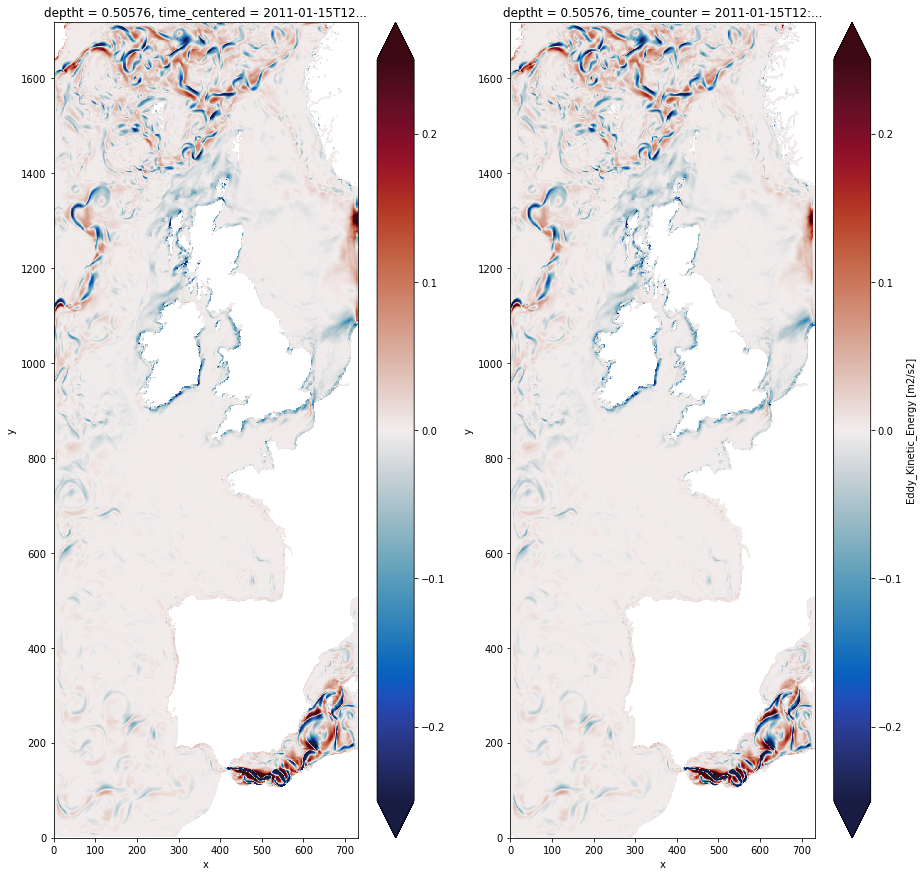

In [34]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
eke[14,0].plot(ax=ax1,vmin=-0.25,vmax=0.25,cmap='cmo.balance')

ax2=axes[1]
eke_cdf[0,0].plot(ax=ax2,vmin=-0.25,vmax=0.25,cmap='cmo.balance')



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


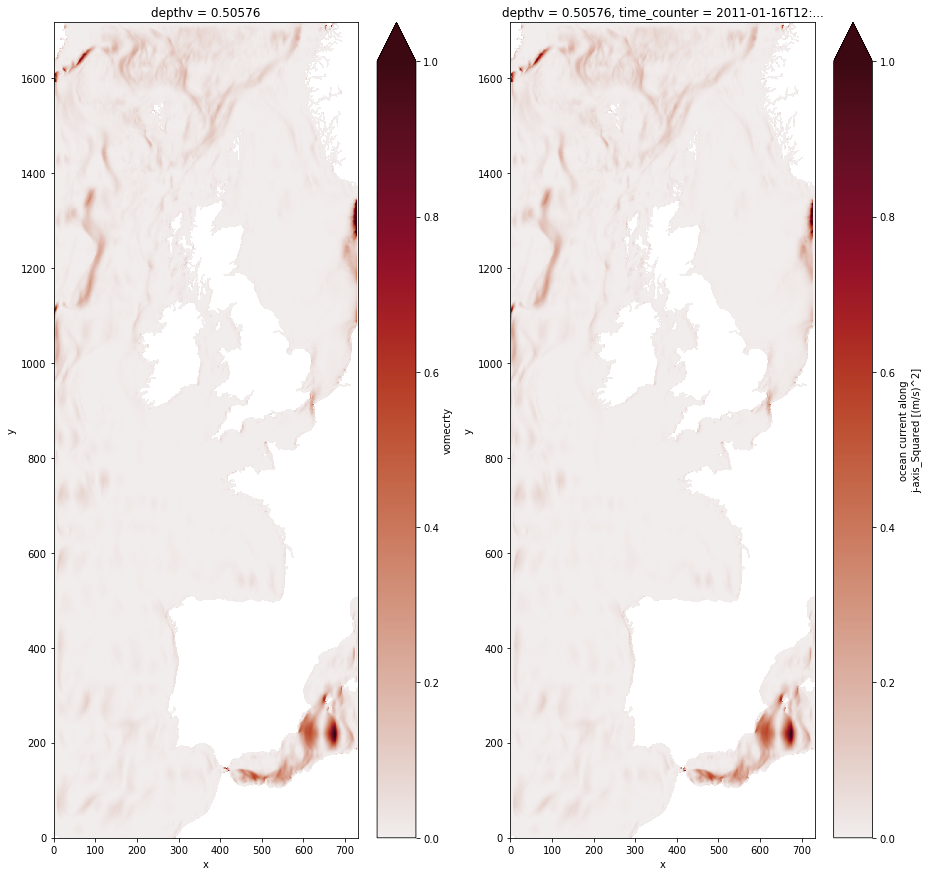

In [22]:
ds=xr.open_dataset('/scratch/cnt0024/hmg2840/albert7a/tests/V2.nc')
u2_cdf=ds.vomecrty_sqd

fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
v2mean[0].plot(ax=ax1,vmin=0,vmax=1,cmap='cmo.amp')

ax2=axes[1]
u2_cdf[0,0].plot(ax=ax2,vmin=0,vmax=1,cmap='cmo.amp')



In [26]:
eke[14].mean(dim='time_counter').max().values

array(1.8458212e-07, dtype=float32)

In [ ]:
u2mean_br=xr.broadcast(u2mean,u)


In [ ]:
diff_br=u2mean_br-u2

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58708 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58714 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58716 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58748 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58762 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:58766 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3:37350 remote=tcp://172.30.100.3:35270>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.30.100.3

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
diff_br[0].mean(dim='time_counter').where(mask[0]==1).plot(cmap='cmo.balance',ax=ax,vmin=-1,vmax=1,add_labels=True)


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
diff=u2mean-u*u
diff[0].mean(dim='time_counter').where(mask[0]==1).plot(cmap='cmo.balance',ax=ax,vmin=-1,vmax=1,add_labels=True)


In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
bn2[50].mean(dim='time_counter').plot(ax=ax1,vmin=-0.00001,vmax=0.00001,cmap='cmo.balance')

ax2=axes[1]
bn2.mean(dim='time_counter')[50].plot(ax=ax2,vmin=-0.00001,vmax=0.00001,cmap='cmo.balance')

